<a href="https://colab.research.google.com/github/raydbasa/Bank-Marketing-with-NN/blob/main/Bank_Marketing_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Names
## **Raed Abduallh Basahih**
## **Osama Mohammad Alkhazan**
## **mohammad mudhhi alotaibi**

## Data URL

https://www.kaggle.com/datasets/dhirajnirne/bank-marketing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

from keras.models import Sequential
from tensorflow import keras
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
%matplotlib inline
sns.set()

# 1. Data Exploration:

## Read Dataset

In [ ]:
df=pd.read_csv("/content/bank-marketing.csv")
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
age group,5,4,3,4,3
eligible,Y,Y,Y,Y,Y
job,management,technician,entrepreneur,blue-collar,unknown
salary,100000,60000,120000,20000,0
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
marital-education,married-tertiary,single-secondary,married-secondary,married-unknown,single-unknown
targeted,yes,yes,yes,no,no
default,no,no,no,no,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [ ]:
df.describe()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
df.shape

(45211, 23)

## EDA

<Axes: xlabel='count', ylabel='job'>

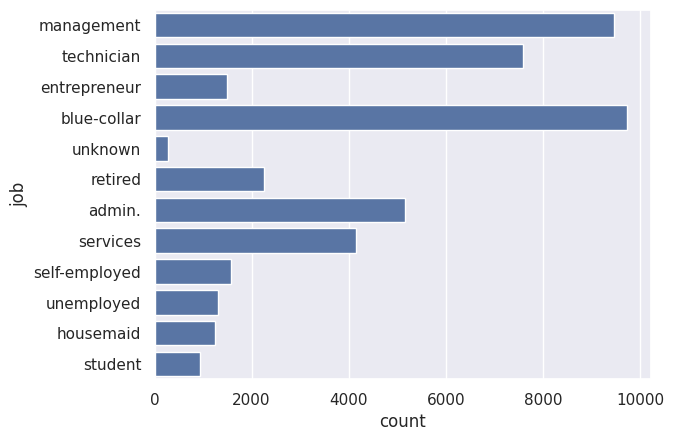

In [ ]:
sns.countplot(df['job'])

<Axes: xlabel='count', ylabel='marital'>

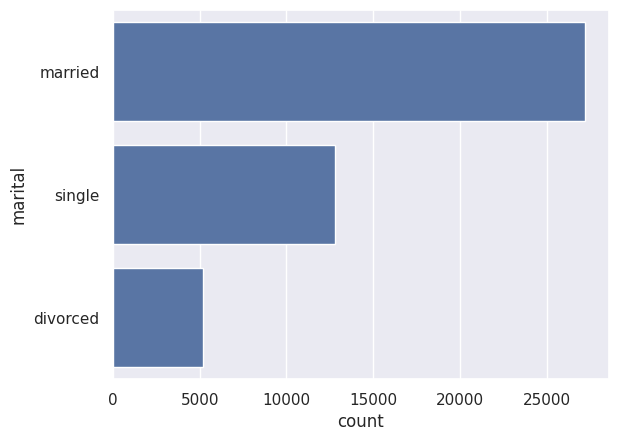

In [ ]:
sns.countplot(df['marital'])

<Axes: xlabel='count', ylabel='education'>

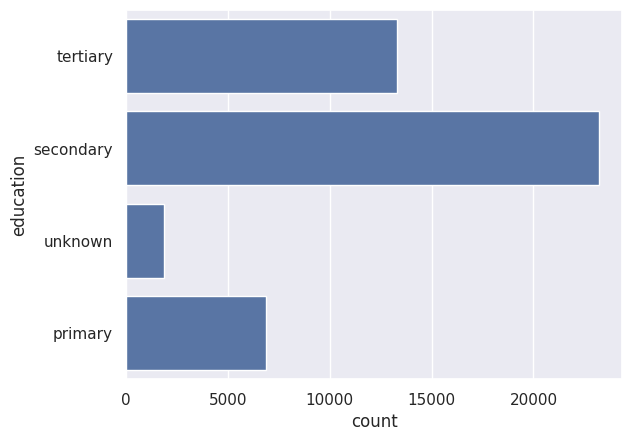

In [ ]:
sns.countplot(df['education'])

<Axes: xlabel='count', ylabel='housing'>

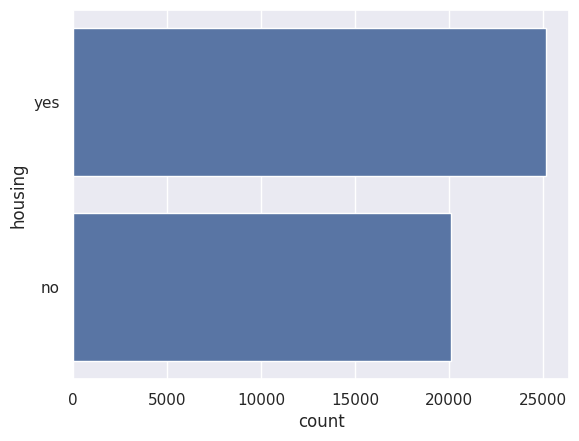

In [ ]:
sns.countplot(df['housing'])

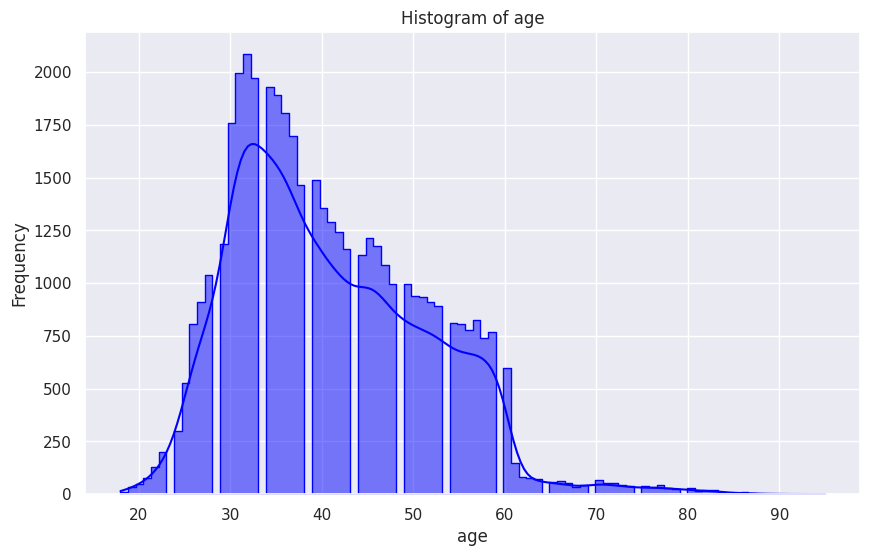

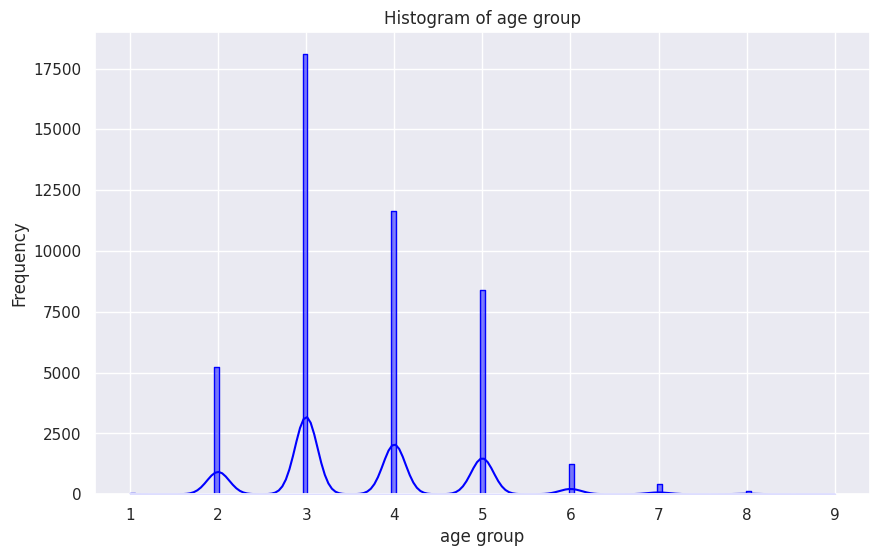

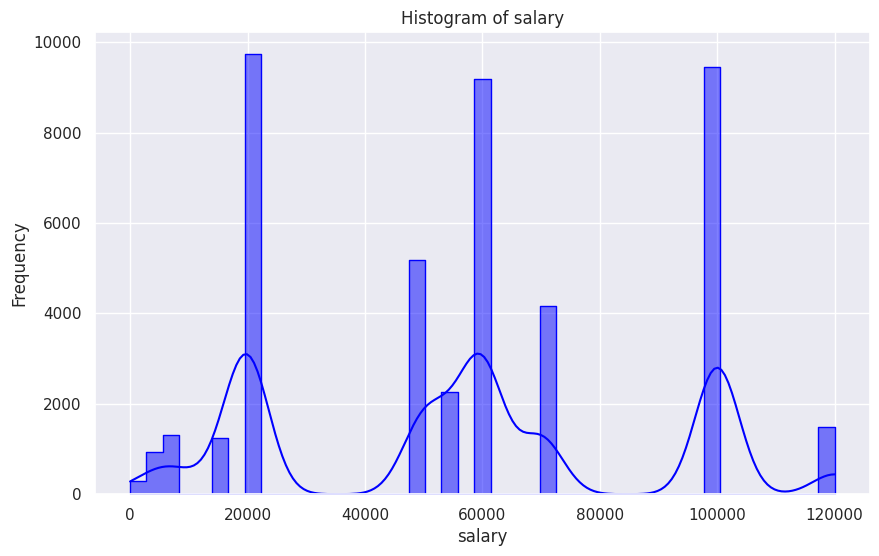

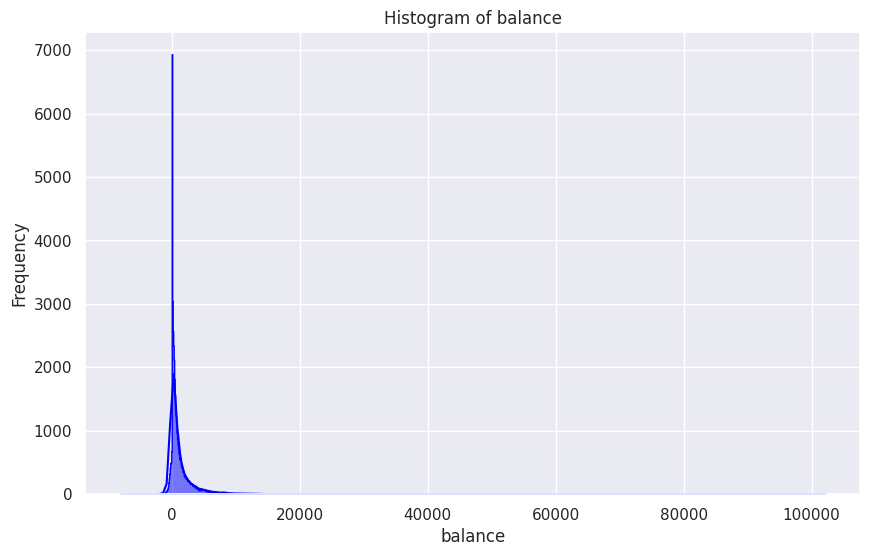

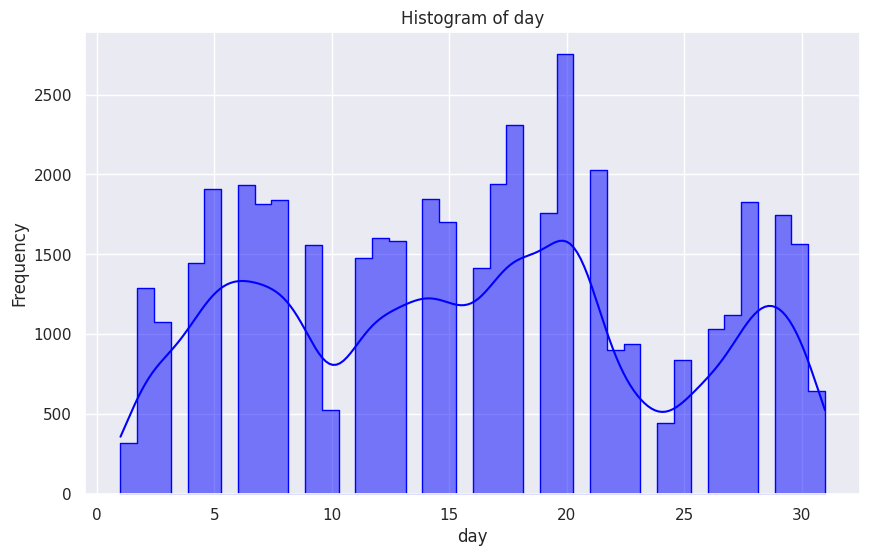

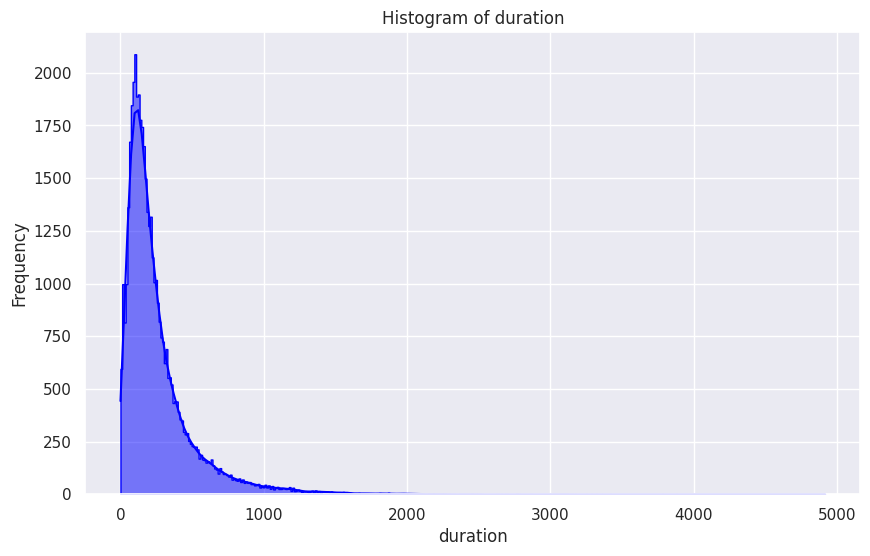

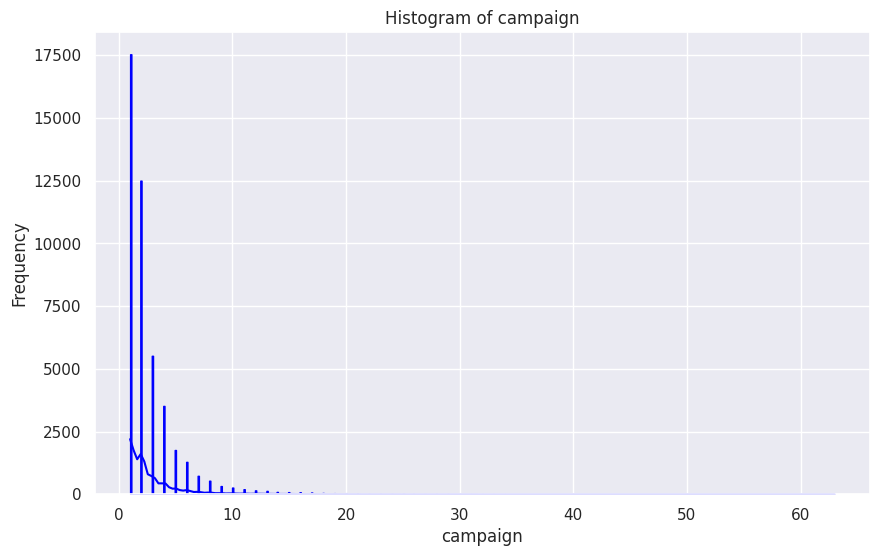

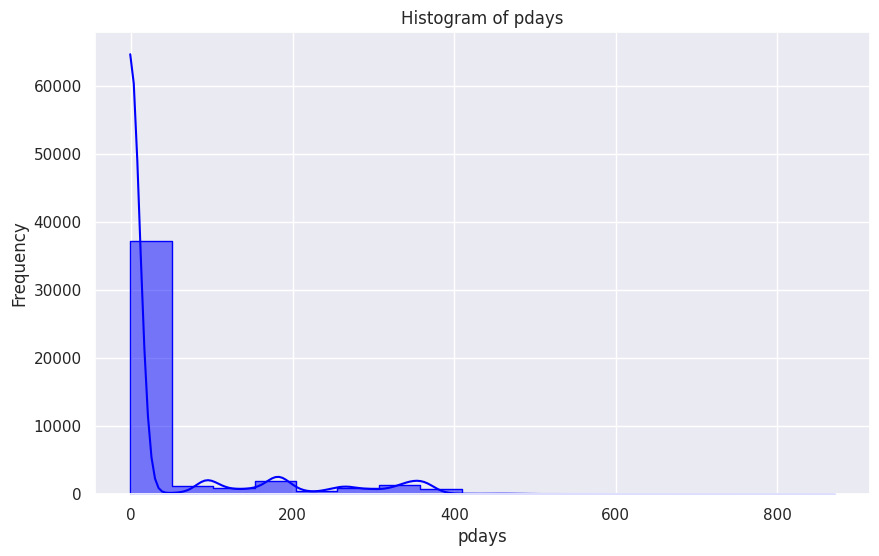

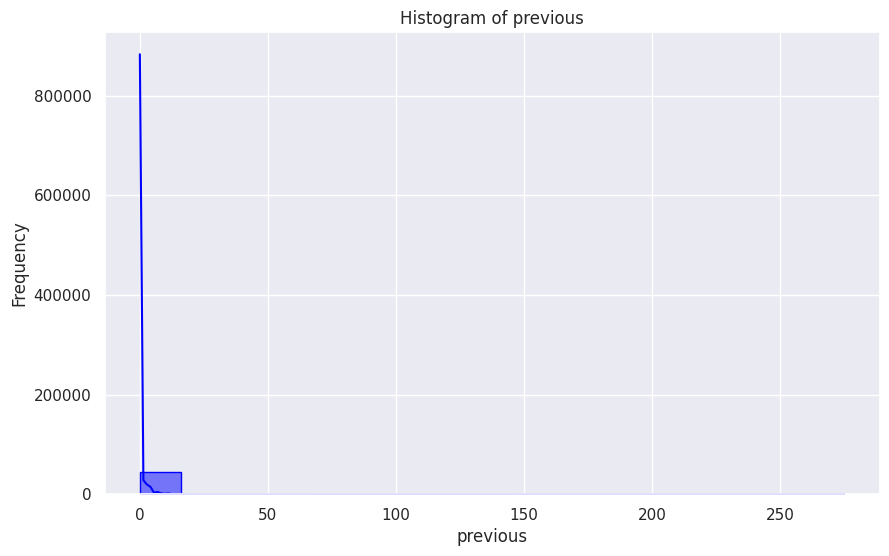

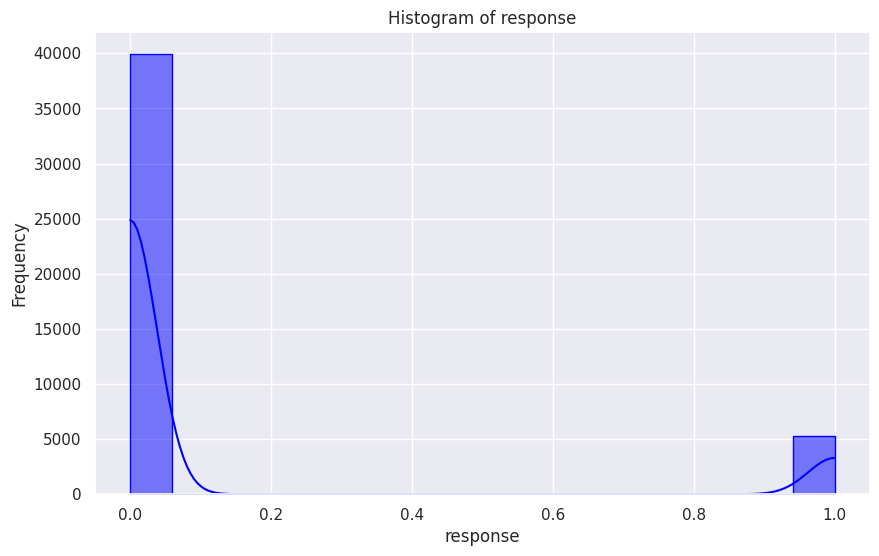

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['number']).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, element='step', color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

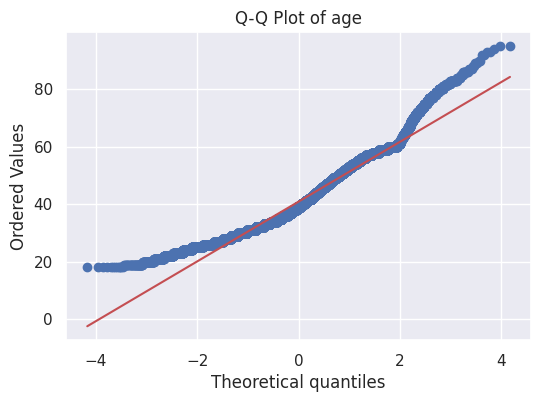

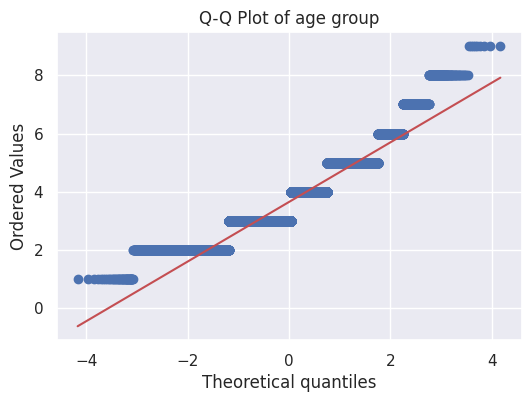

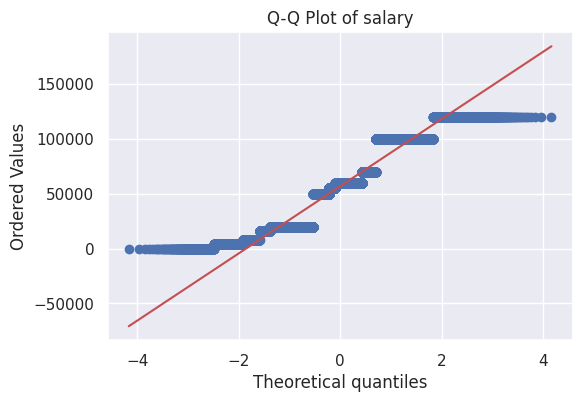

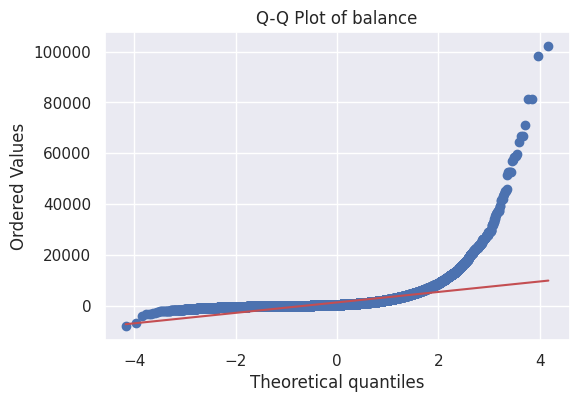

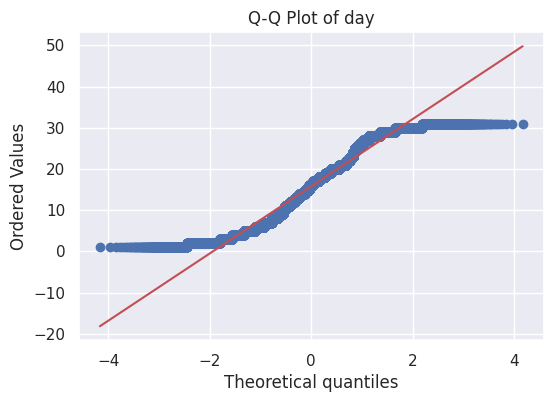

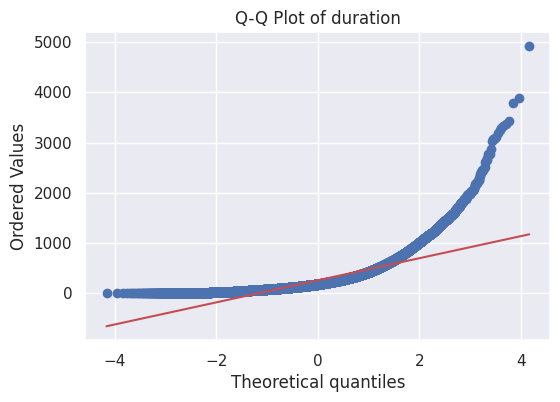

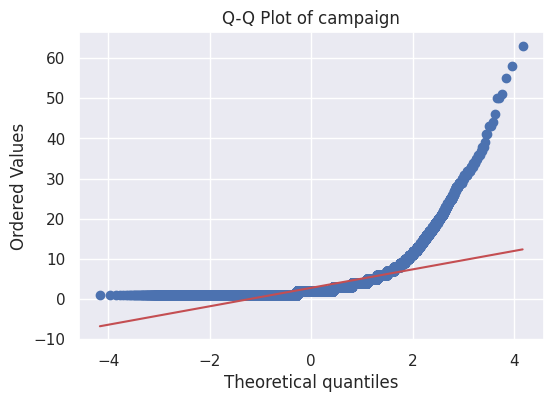

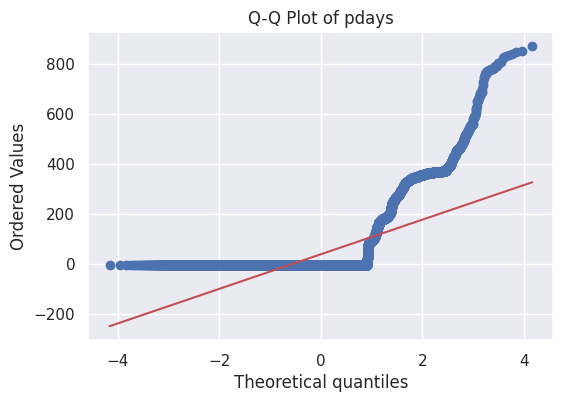

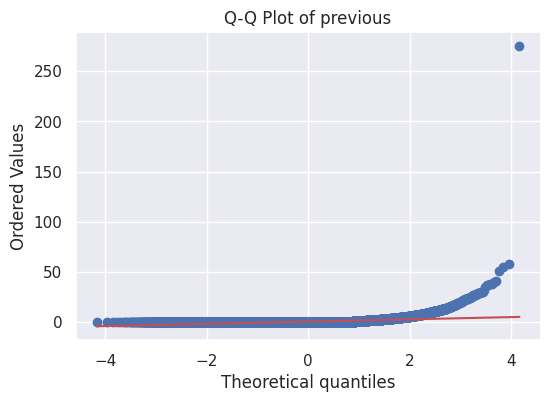

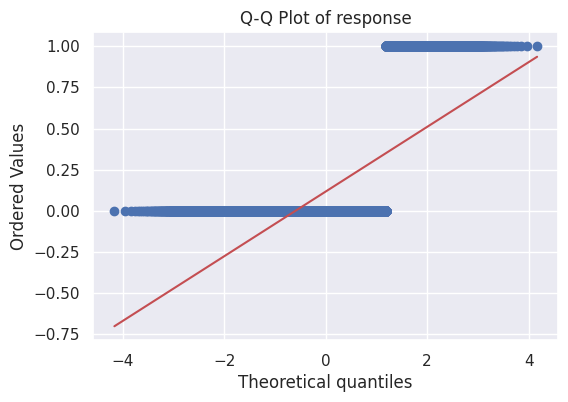

In [ ]:
import scipy.stats as stats

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    plt.show()

## Data clean

In [ ]:
df.nunique()

age                    77
age group               9
eligible                2
job                    12
salary                 11
marital                 3
education               4
marital-education      12
targeted                2
default                 2
balance              7168
housing                 2
loan                    2
contact                 3
day                    31
month                  12
duration             1573
campaign               48
pdays                 559
previous               41
poutcome                4
y                       2
response                2
dtype: int64

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df['job'] = df['job'].replace({'admin.':'admin'})


In [ ]:
df.isna().sum()

age                  0
age group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## standardisation

In [ ]:
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['balance'] = scaler.fit_transform(df[['balance']])
df['day'] = scaler.fit_transform(df[['day']])
df['duration'] = scaler.fit_transform(df[['duration']])
df['campaign'] = scaler.fit_transform(df[['campaign']])
df['pdays'] = scaler.fit_transform(df[['pdays']])
df['previous'] = scaler.fit_transform(df[['previous']])
df['duration'] = scaler.fit_transform(df[['duration']])
df['campaign'] = scaler.fit_transform(df[['campaign']])
df['response'] = scaler.fit_transform(df[['response']])
df['salary'] = scaler.fit_transform(df[['salary']])

In [ ]:
df.head(2)

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,1.606965,5,Y,management,1.339983,married,tertiary,married-tertiary,yes,no,0.256419,yes,no,unknown,-1.298476,may,0.011016,-0.569351,-0.411453,-0.25194,unknown,no,-0.363983
1,0.288529,4,Y,technician,0.093308,single,secondary,single-secondary,yes,no,-0.437895,yes,no,unknown,-1.298476,may,-0.416127,-0.569351,-0.411453,-0.25194,unknown,no,-0.363983


## Label Encoding

In [ ]:
encoder = LabelEncoder()
df['job'] = encoder.fit_transform(df['job'])
df['marital'] = encoder.fit_transform(df['marital'])
df['education'] = encoder.fit_transform(df['education'])
df['contact'] = encoder.fit_transform(df['contact'])
df['month'] = encoder.fit_transform(df['month'])
df['y'] = encoder.fit_transform(df['y'])
df['housing'] = encoder.fit_transform(df['housing'])
df['loan'] = encoder.fit_transform(df['loan'])
df['poutcome'] = encoder.fit_transform(df['poutcome'])
df['default'] = encoder.fit_transform(df['default'])
df['eligible'] = encoder.fit_transform(df['eligible'])
df['marital-education'] = encoder.fit_transform(df['marital-education'])
df['targeted'] = encoder.fit_transform(df['targeted'])
df['poutcome'] = encoder.fit_transform(df['poutcome'])

In [ ]:
class_counts = df['targeted'].value_counts()
print(class_counts)

targeted
1    37091
0     8120
Name: count, dtype: int64


In [ ]:
df.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,1.606965,5,1,4,1.339983,1,2,6,1,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,0,-0.363983
1,0.288529,4,1,9,0.093308,2,1,9,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0,-0.363983
2,-0.747384,3,1,2,1.963320,1,1,5,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0,-0.363983
3,0.571051,4,1,1,-1.153366,1,3,7,0,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0,-0.363983
4,-0.747384,3,1,11,-1.776703,2,3,11,0,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0,-0.363983


## Drop unnecessary columns

In [ ]:
df.drop(columns=['day','month','contact','marital-education','age group','housing','y','poutcome','previous'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   eligible   45211 non-null  int64  
 2   job        45211 non-null  int64  
 3   salary     45211 non-null  float64
 4   marital    45211 non-null  int64  
 5   education  45211 non-null  int64  
 6   targeted   45211 non-null  int64  
 7   default    45211 non-null  int64  
 8   balance    45211 non-null  float64
 9   loan       45211 non-null  int64  
 10  duration   45211 non-null  float64
 11  campaign   45211 non-null  float64
 12  pdays      45211 non-null  float64
 13  response   45211 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 4.8 MB


## Heat Map

<Axes: >

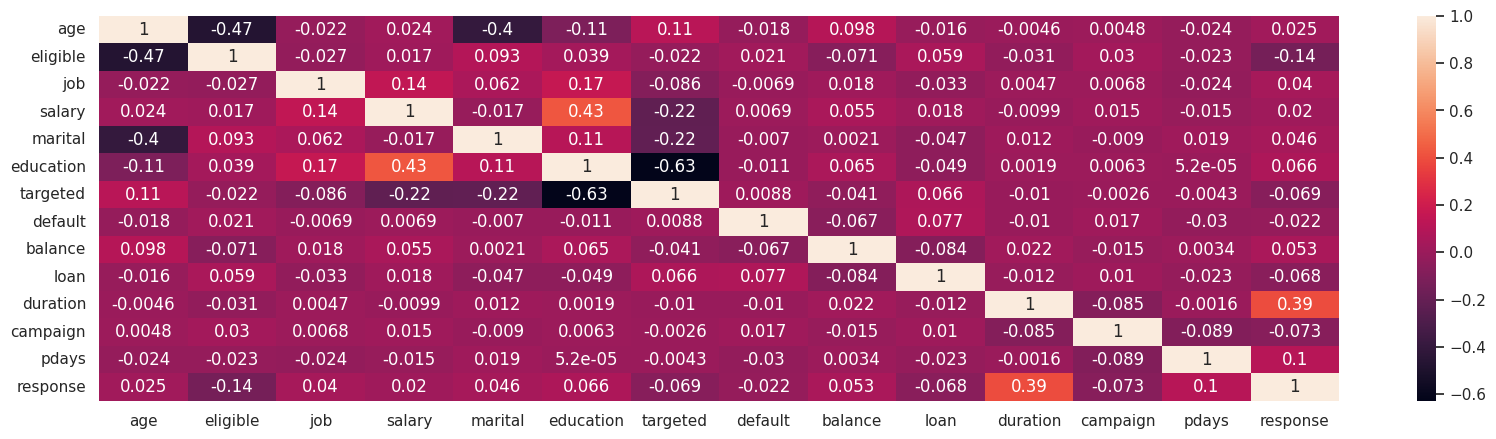

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)

# 2. Modeling

## data spliting




In [ ]:
X = df.drop("targeted", axis=1)
y = df['targeted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [ ]:
X_train

,age,eligible,job,salary,marital,education,default,balance,loan,duration,campaign,pdays,response
14565,-1.124080,1,3,-1.278034,1,0,0,-0.447419,0,0.228471,0.076230,-0.411453,-0.363983
20546,1.512791,1,4,1.339983,0,1,0,-0.317359,0,-0.583101,-0.246560,-0.411453,-0.363983
34495,1.230269,1,1,-1.153366,1,0,0,-0.212916,0,-0.128776,-0.569351,-0.411453,-0.363983
13814,1.041921,1,7,0.404977,1,1,0,0.233100,0,-0.132659,-0.569351,-0.411453,-0.363983
42153,-0.653211,1,4,1.339983,1,2,0,0.136540,0,0.387679,-0.569351,1.216469,2.747384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.288529,1,3,-1.278034,2,0,0,-0.099605,0,7.124890,-0.569351,-0.411453,2.747384
44732,-1.689124,1,8,-1.652036,2,2,0,-0.280574,0,-0.187023,-0.569351,0.517361,-0.363983
38158,-0.653211,1,9,0.093308,0,2,0,-0.014869,0,-0.074413,-0.569351,-0.411453,-0.363983
860,-0.747384,1,5,-0.062526,1,1,0,-0.393227,0,-0.571452,-0.569351,-0.411453,-0.363983


## Train model

### The Best model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import keras.layers as L

model_1 = keras.models.Sequential([

L.Input(shape=(13,)),
L.Dense(units=24, activation='LeakyReLU'),
L.Dense(units=8, activation='LeakyReLU'),
#output
L.Dense(units=1, activation='sigmoid'),
])

model_1.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy','Precision'],
)

model_1.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 24)                336       
                                                                 
 dense_123 (Dense)           (None, 8)                 200       
                                                                 
 dense_124 (Dense)           (None, 1)                 9         
                                                                 
Total params: 545 (2.13 KB)
Trainable params: 545 (2.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=7,
    validation_split=0.1,
)

Epoch 1/7
367/367 [==============================] - 1s 2ms/step - loss: 0.3998 - accuracy: 0.8278 - precision: 0.8441 - val_loss: 0.2528 - val_accuracy: 0.8798 - val_precision: 0.8967
Epoch 2/7
367/367 [==============================] - 1s 2ms/step - loss: 0.2080 - accuracy: 0.9138 - precision: 0.9383 - val_loss: 0.1963 - val_accuracy: 0.9304 - val_precision: 0.9445
Epoch 3/7
367/367 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9375 - precision: 0.9529 - val_loss: 0.1847 - val_accuracy: 0.9432 - val_precision: 0.9492
Epoch 4/7
367/367 [==============================] - 1s 1ms/step - loss: 0.1688 - accuracy: 0.9465 - precision: 0.9567 - val_loss: 0.1642 - val_accuracy: 0.9543 - val_precision: 0.9582
Epoch 5/7
367/367 [==============================] - 1s 1ms/step - loss: 0.1380 - accuracy: 0.9557 - precision: 0.9601 - val_loss: 0.1087 - val_accuracy: 0.9624 - val_precision: 0.9640
Epoch 6/7
367/367 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

input_dim = X_train.shape[1]  # make sure this is set correctly

model = Sequential([
    Dense(50, activation='relu', input_shape=(input_dim,)),
    Dropout(0.4),
    Dense(30, activation='relu'),
    Dense(20, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Now fit the model


In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=7,
    validation_split=0.1
    )


Epoch 1/7
367/367 [==============================] - 2s 2ms/step - loss: 0.4665 - accuracy: 0.7938 - val_loss: 0.2737 - val_accuracy: 0.8587
Epoch 2/7
367/367 [==============================] - 1s 2ms/step - loss: 0.2752 - accuracy: 0.8733 - val_loss: 0.1775 - val_accuracy: 0.9388
Epoch 3/7
367/367 [==============================] - 1s 2ms/step - loss: 0.1844 - accuracy: 0.9327 - val_loss: 0.0632 - val_accuracy: 0.9884
Epoch 4/7
367/367 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9709 - val_loss: 0.0212 - val_accuracy: 0.9968
Epoch 5/7
367/367 [==============================] - 1s 2ms/step - loss: 0.0576 - accuracy: 0.9854 - val_loss: 0.0095 - val_accuracy: 0.9978
Epoch 6/7
367/367 [==============================] - 1s 2ms/step - loss: 0.0382 - accuracy: 0.9924 - val_loss: 0.0048 - val_accuracy: 0.9995
Epoch 7/7
367/367 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9946 - val_loss: 0.0043 - val_accuracy: 0.9993


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
y_pred = model_1.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

142/142 [==============================] - 0s 970us/step
[[ 849    0]
 [   7 3666]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       849
           1       1.00      1.00      1.00      3673

    accuracy                           1.00      4522
   macro avg       1.00      1.00      1.00      4522
weighted avg       1.00      1.00      1.00      4522



In [ ]:
model_1.evaluate(X_test, y_test)

142/142 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9985 - precision: 1.0000


[0.015608107671141624, 0.9984520077705383, 1.0]